In [1]:
from simplevolumeviewer import VolumeStorage
import nrrd
import matplotlib.pyplot as plt

In [2]:
# Load data from file (loaded from https://www.embodi3d.com/).

In [3]:
voxeldata, header = nrrd.read('data/CTChest.nrrd')
print(header['space'])

left-posterior-superior


In [4]:
# Valid direction names:
# left/right - for frontal axis
# posterior/anterior - lateral axis
# superior/inferior - vertical axis

In [5]:
# Creat and init VoxelVolume

In [6]:
VS = VolumeStorage(voxeldata, header['space'],
                   initStandarView = False, # defailt value is True
                   verticalFlip = False # defailt value is True
                  )

In [7]:
# Let's add view point in axial plane (view direction is "superior" and up direction is "anterior") 
# with name "AX"
VS.addView(name = 'AX', viewDirection = 'superior', 
           upDirection = 'anterior',
           verticalFlip = False) # default True

In [8]:
print(VS.getViews().keys())

dict_keys(['AX'])


In [9]:
# Get the view

In [10]:
V = VS.getViews()['AX']

In [11]:
# Check directions

In [12]:
print(V.getDirectionNames())

{'view': 'superior', 'up': 'anterior'}


In [13]:
# Check the index limits along the view axis

In [14]:
print(V.getIndexLimits())

(0, 138)


In [15]:
# Check the current index of the view (after initialization index has the 'central' value)

In [16]:
print(V.getCurrentIndex())

69


In [17]:
# Get current slice

In [18]:
S = V.getCurrentSlice()

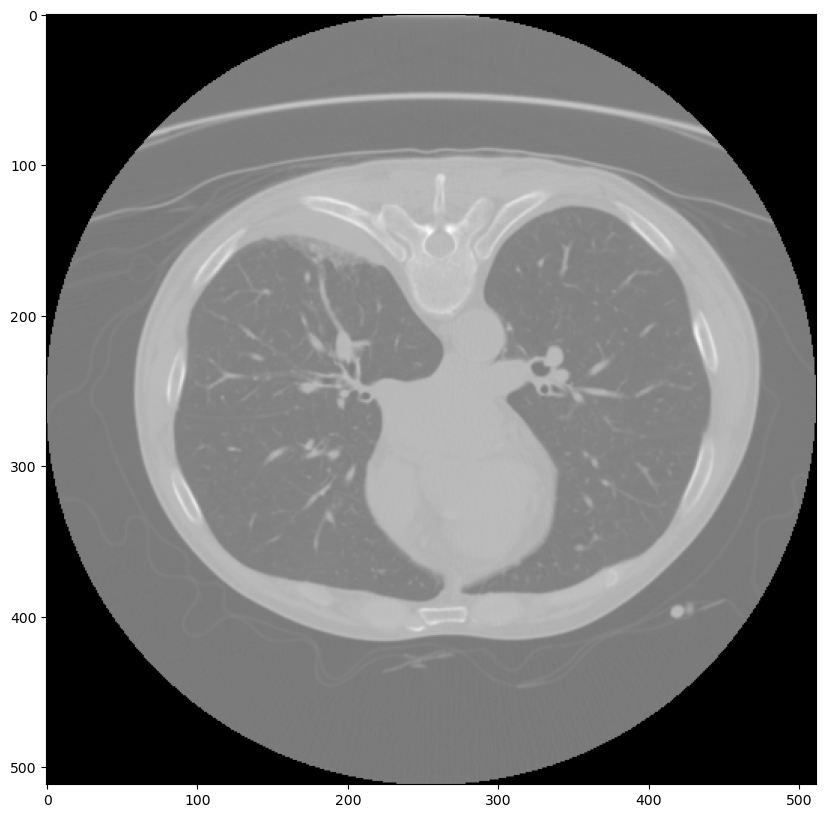

In [19]:
plt.figure(figsize = (10, 10))
plt.imshow(S, cmap = 'grey')
plt.show()

In [20]:
# Image inverted because images are being indexrd from top. We can use verticalFlip parameter
# with True value (or skip it).

dict_keys(['AX', 'AX-inverted'])
(0, 138)
69


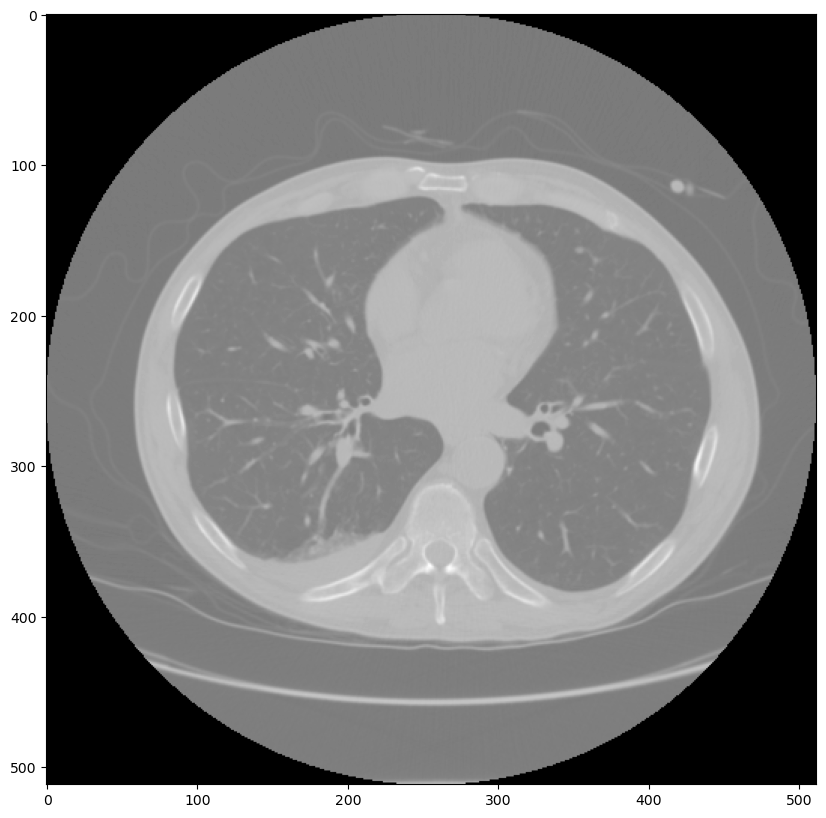

In [21]:
VS.addView(name = 'AX-inverted', viewDirection = 'superior', 
           upDirection = 'anterior')

print(VS.getViews().keys())

V = VS.getViews()['AX-inverted']

print(V.getIndexLimits())
print(V.getCurrentIndex())

S = V.getCurrentSlice()

plt.figure(figsize = (10, 10))
plt.imshow(S, cmap = 'grey')
plt.show()

In [22]:
# Change current index

In [23]:
V.setCurrentIndex(100)
print(V.getCurrentIndex())

100


In [24]:
# Check next/previous slices and iterations

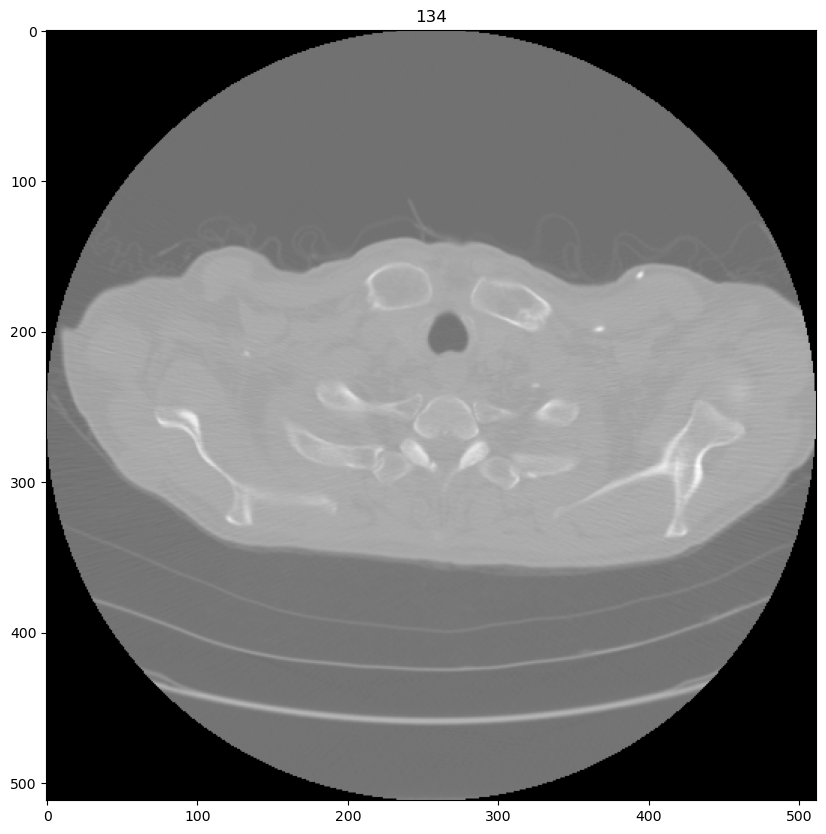

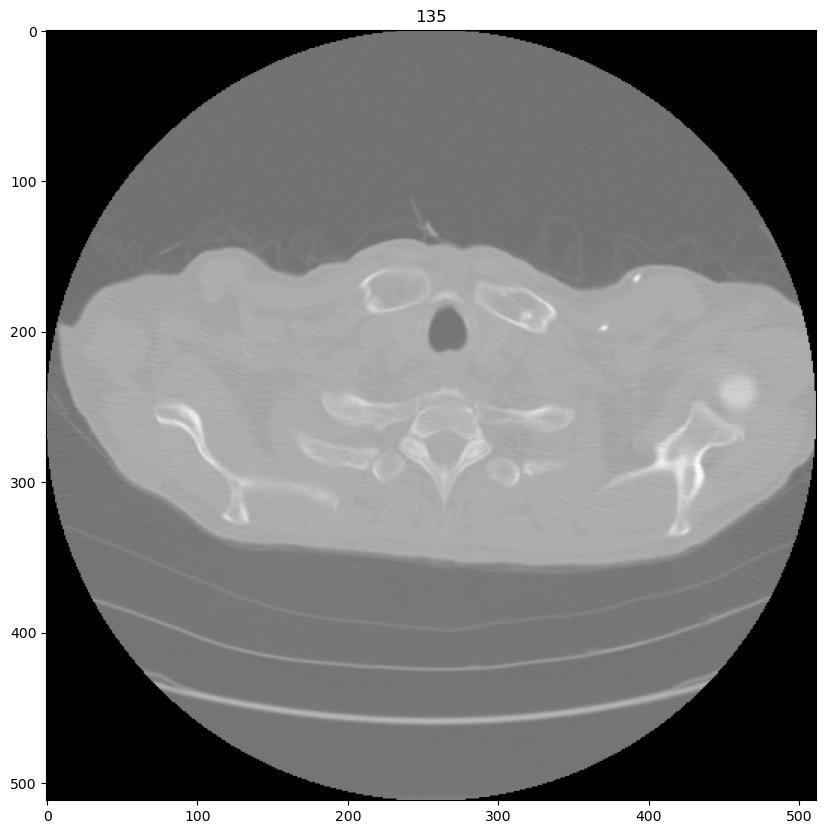

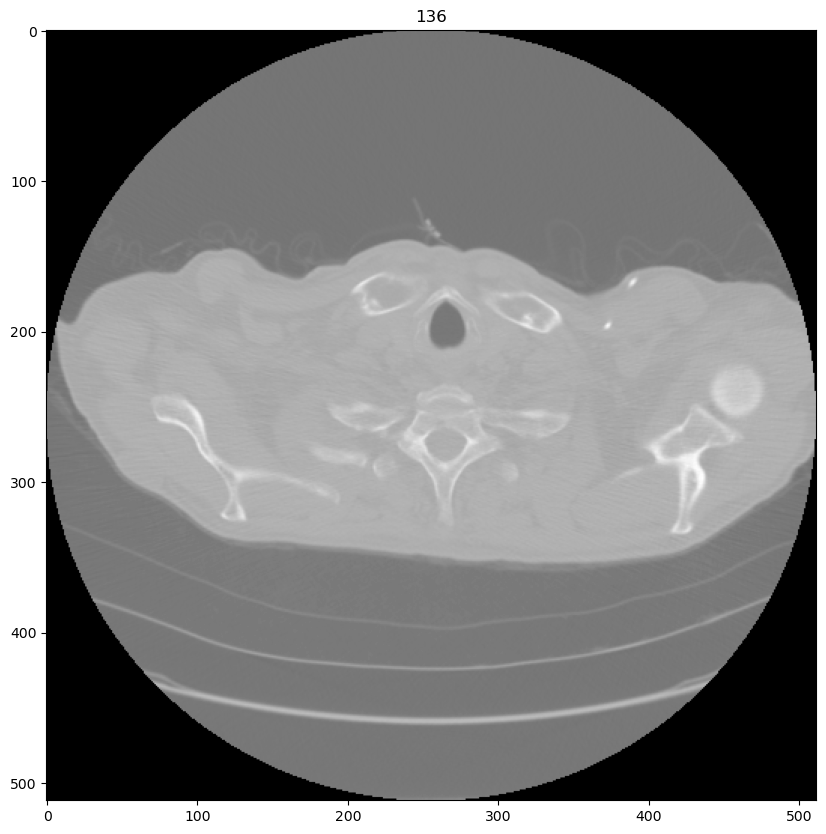

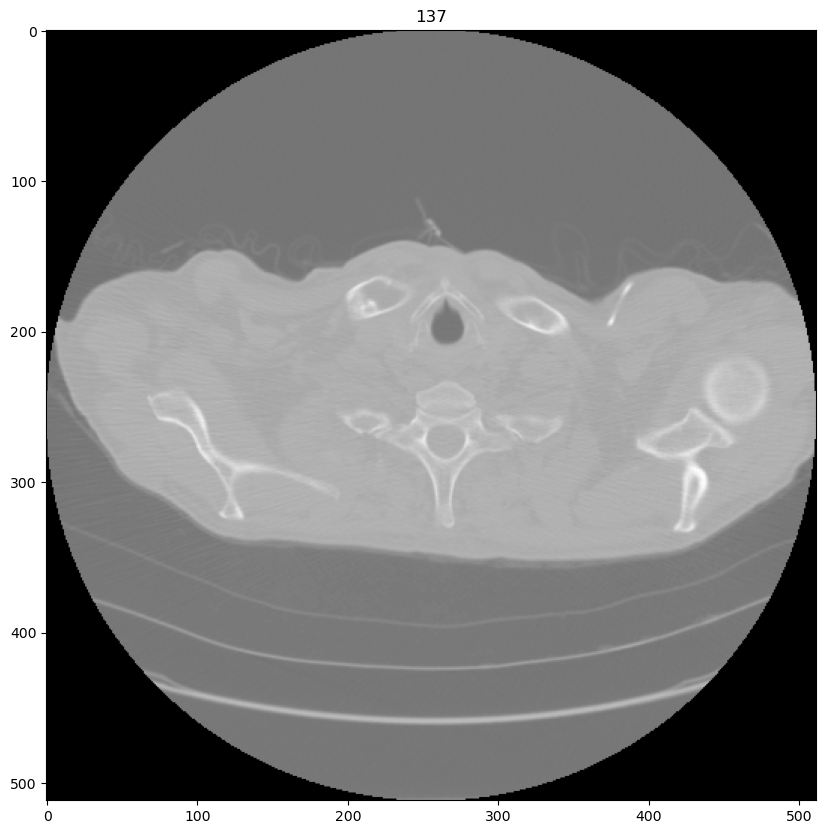

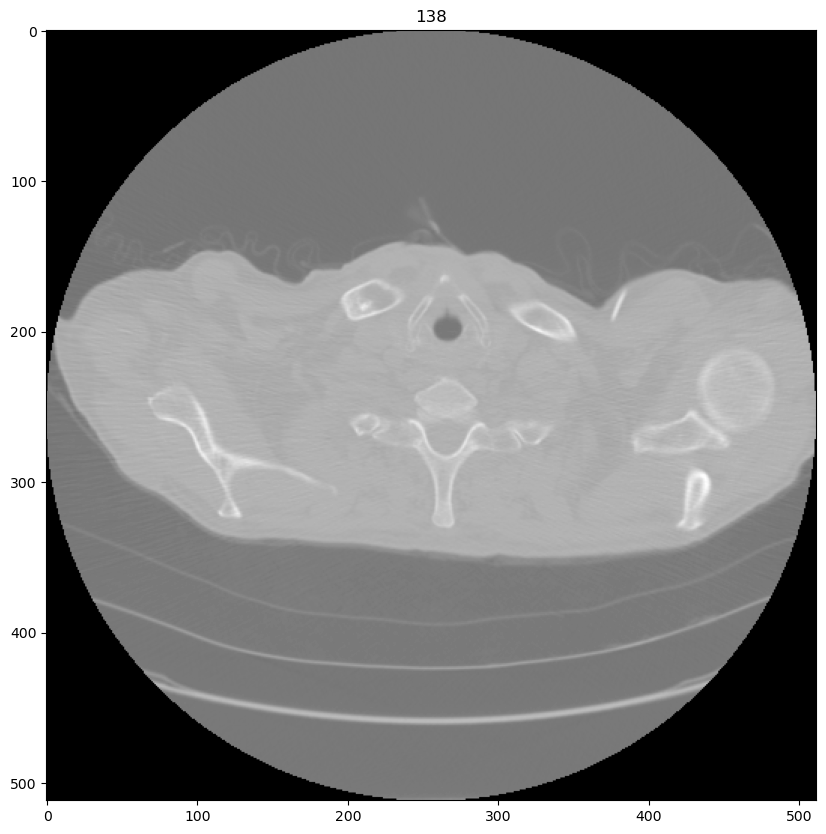

In [25]:
V.setCurrentIndex(133)
while V.hasNext():
    S = V.getNextSlice()
    
    plt.figure(figsize = (10, 10))
    plt.imshow(S, cmap = 'grey')
    plt.title(str(V.getCurrentIndex()))
    plt.show()

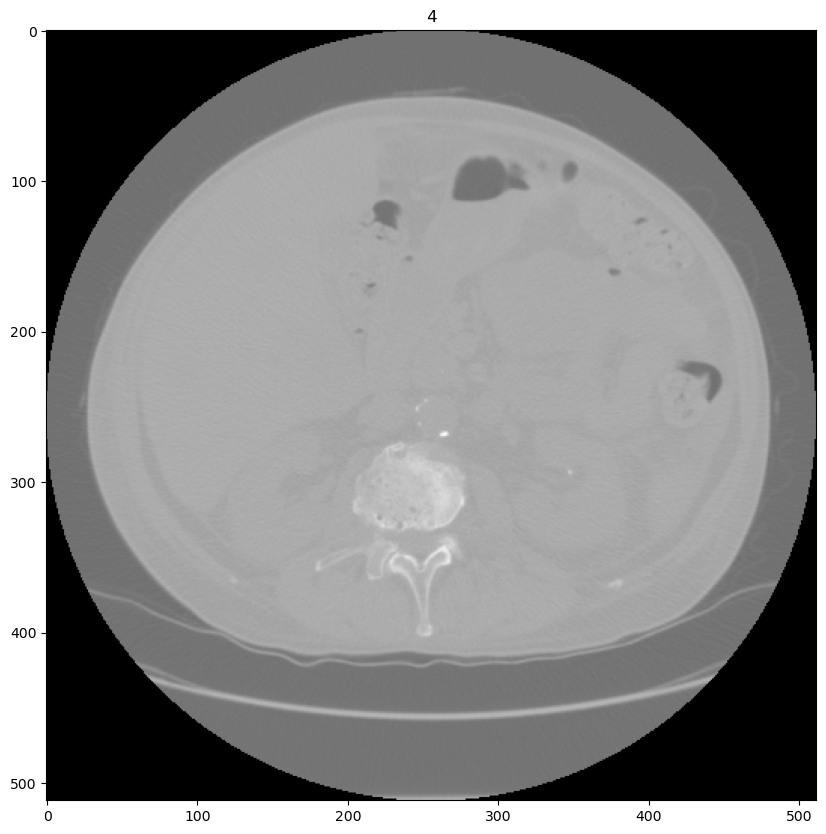

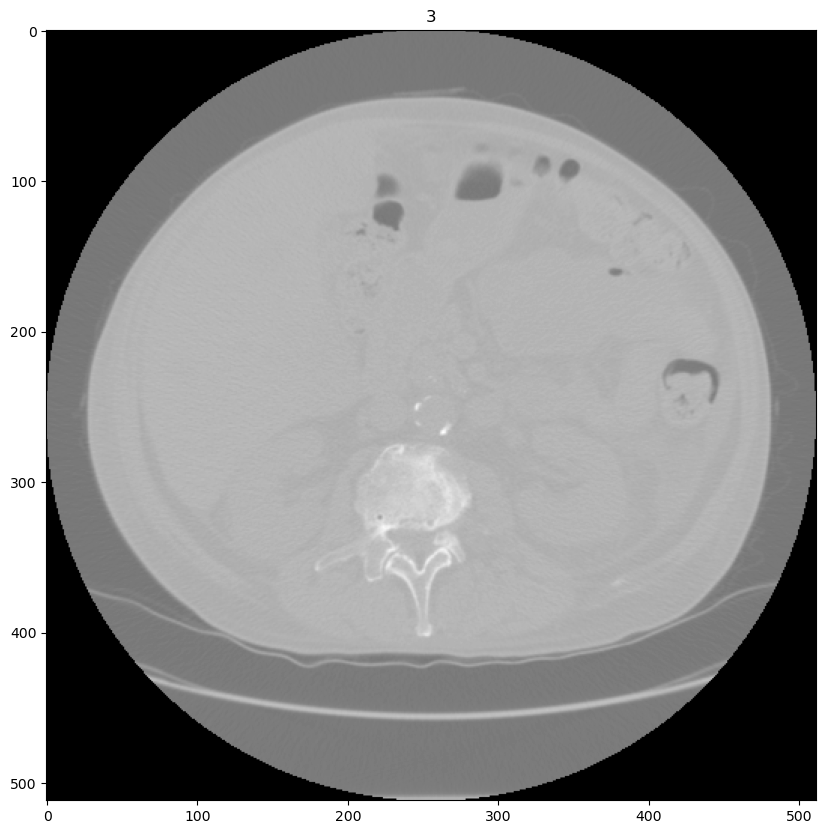

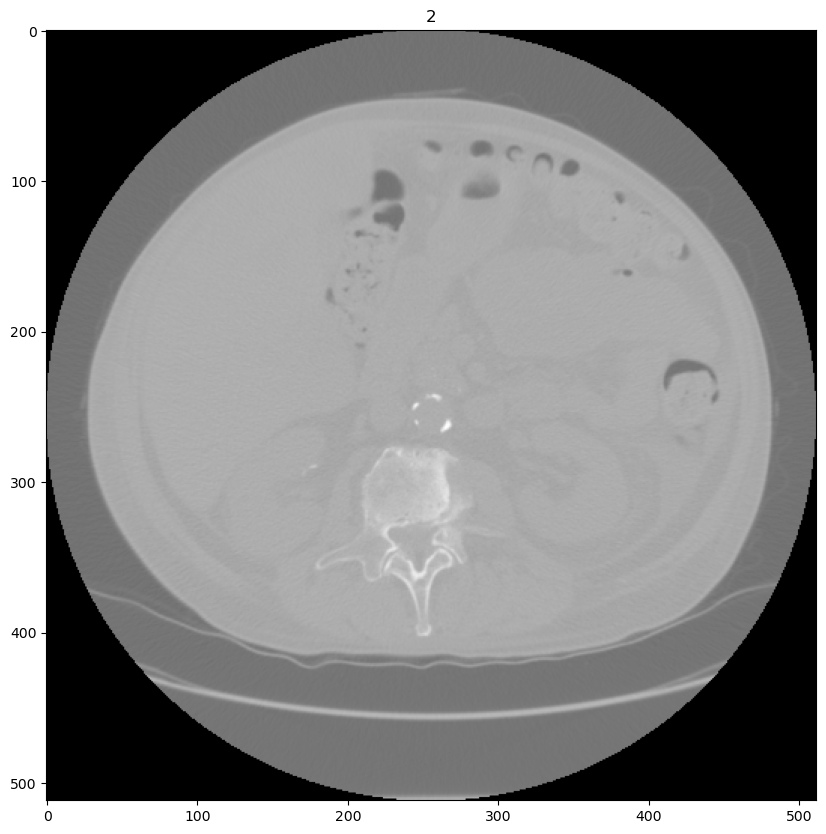

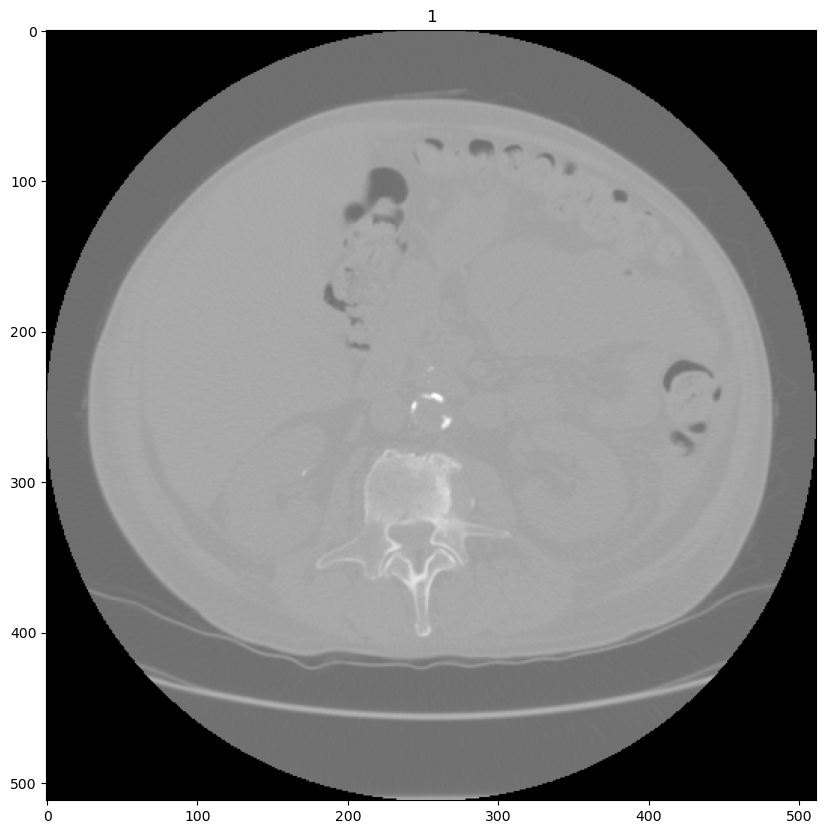

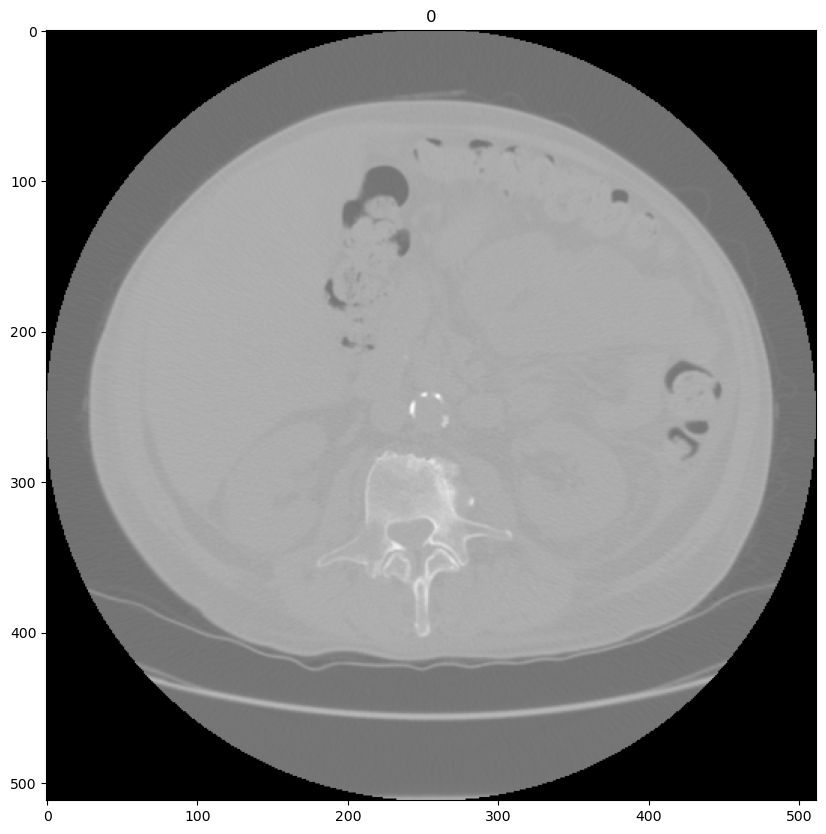

In [26]:
V.setCurrentIndex(5)
while V.hasPrev():
    S = V.getPrevSlice()
    
    plt.figure(figsize = (10, 10))
    plt.imshow(S, cmap = 'grey')
    plt.title(str(V.getCurrentIndex()))
    plt.show()

In [27]:
# Iterations change current index value!

In [28]:
# Access to random slice

In [29]:
print(V.getCurrentIndex())
S = V.getSlice(100)
print(V.getCurrentIndex())

0
0


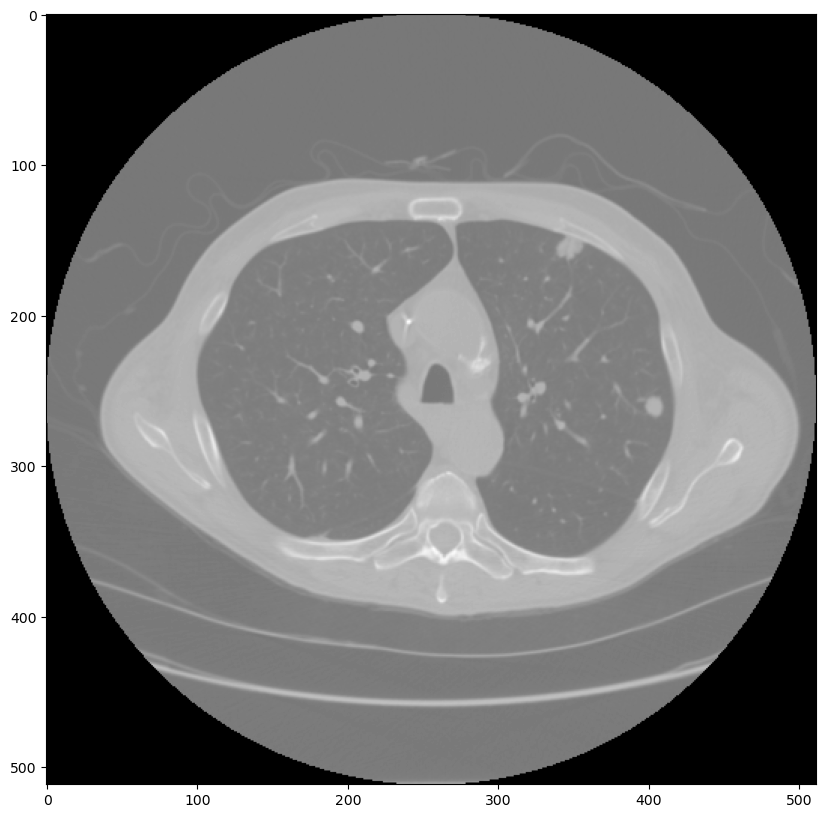

In [30]:
plt.figure(figsize = (10, 10))
plt.imshow(S, cmap = 'grey')
plt.show()

In [31]:
# Method getSlice doesn't change value of the current index

In [32]:
# MIP

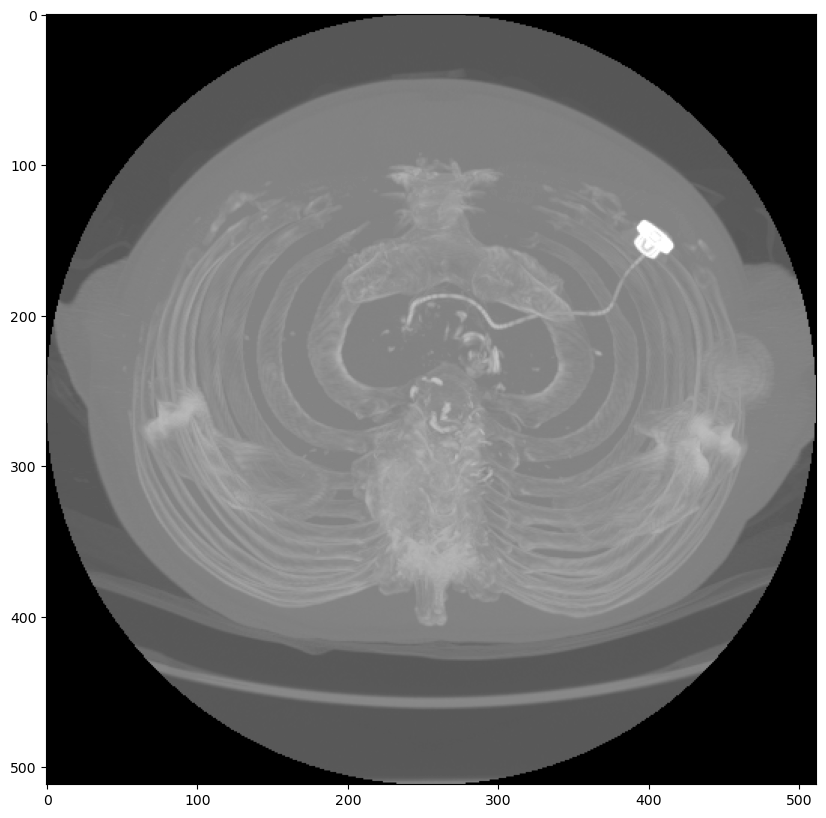

In [33]:
S = V.getMIP()

plt.figure(figsize = (10, 10))
plt.imshow(S, cmap = 'grey')
plt.show()

In [34]:
# We can create volume storage with standart progections: use True for initStandarView (or skip it)
# and use False or True for verticalFlip (or skip it in case of True)

In [35]:
VS = VolumeStorage(voxeldata, header['space'],
                   initStandarView = True, # defailt value is True
                   verticalFlip = True # defailt value is True
                  )

In [36]:
print(VS.getViews().keys())

dict_keys(['frontal', 'lateral', 'axial'])


{'view': 'posterior', 'up': 'superior'}


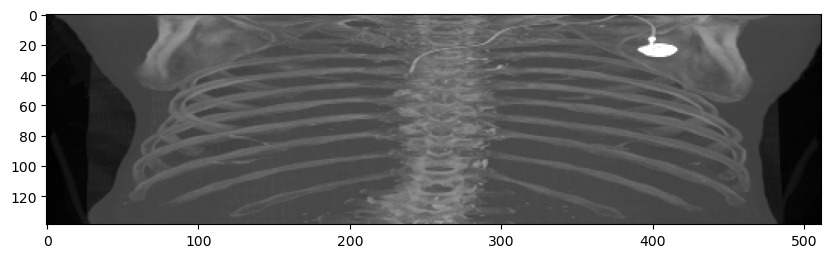

{'view': 'right', 'up': 'superior'}


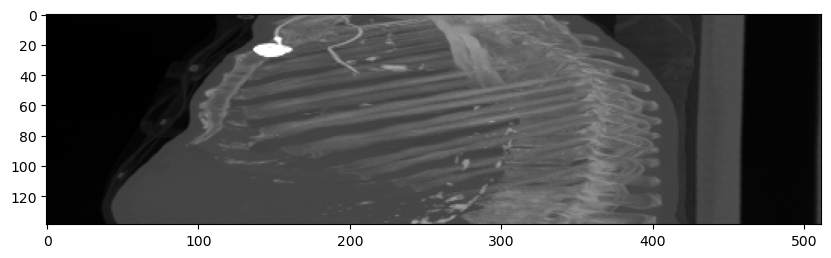

{'view': 'inferior', 'up': 'anterior'}


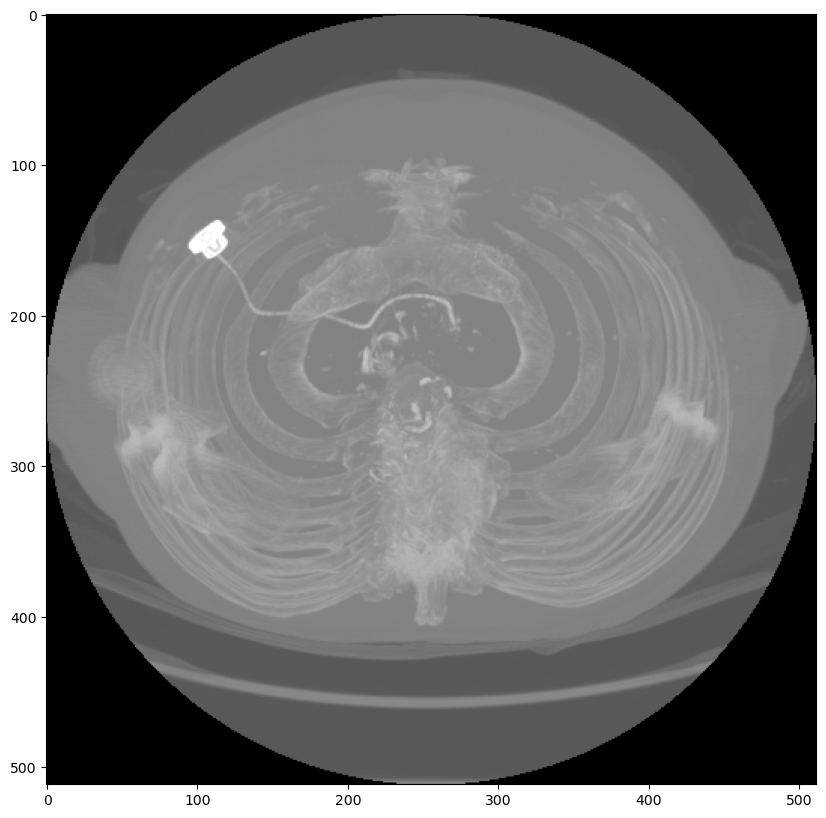

In [37]:
for k in VS.getViews().keys():
    
    print(VS.getViews()[k].getDirectionNames())
    
    plt.figure(figsize = (10, 10))
    plt.imshow(VS.getViews()[k].getMIP(), cmap = 'grey')
    plt.show()